In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from common_dse import fetch_data, get_backtest_result, get_hodl_result, max_drawdown, sharpe_ratio, save_cache_data, load_cache_data

In [2]:
# Compute funding rate PNL with only one market
exchanges_market = {
    "binance": "BTCUSDT",
    "bitmex": "XBTUSD",
    "apollox": "BTCUSDT",
    "drift": "BTC-PERP",
}
benchmark_exchange = "binance"
benchmark_market = exchanges_market[benchmark_exchange]

# Initial variables
min_time = datetime.fromisoformat('2023-08-01').timestamp()
max_time = datetime.fromisoformat('2024-02-29').timestamp()

data_df_map = {}
results = {}

leverage = 1

# Read data from file
for exchange, market in exchanges_market.items():
    data_df = load_cache_data(exchange, market)
    data_df_map[exchange] = data_df

# calculate min max time
for exchange, market in exchanges_market.items():
    data_df = data_df_map[exchange]
    min_time = max(min_time, data_df["timestamp"].min())
    max_time = min(max_time, data_df["timestamp"].max())

# Calculate funding rate backtest result
for exchange, market in exchanges_market.items():
    data_df = data_df_map[exchange]
    data_df['datetime'] = data_df['datetime'].apply(lambda x: pd.to_datetime(x))

    data_df = data_df[
        (data_df["timestamp"] >= min_time) & (data_df["timestamp"] <= max_time)
    ]

    data_df = data_df.sort_values(by='datetime', ascending=True)
    data_df = data_df.reset_index(drop=True)

    results[exchange] = data_df

# Results are store in 'results' variable

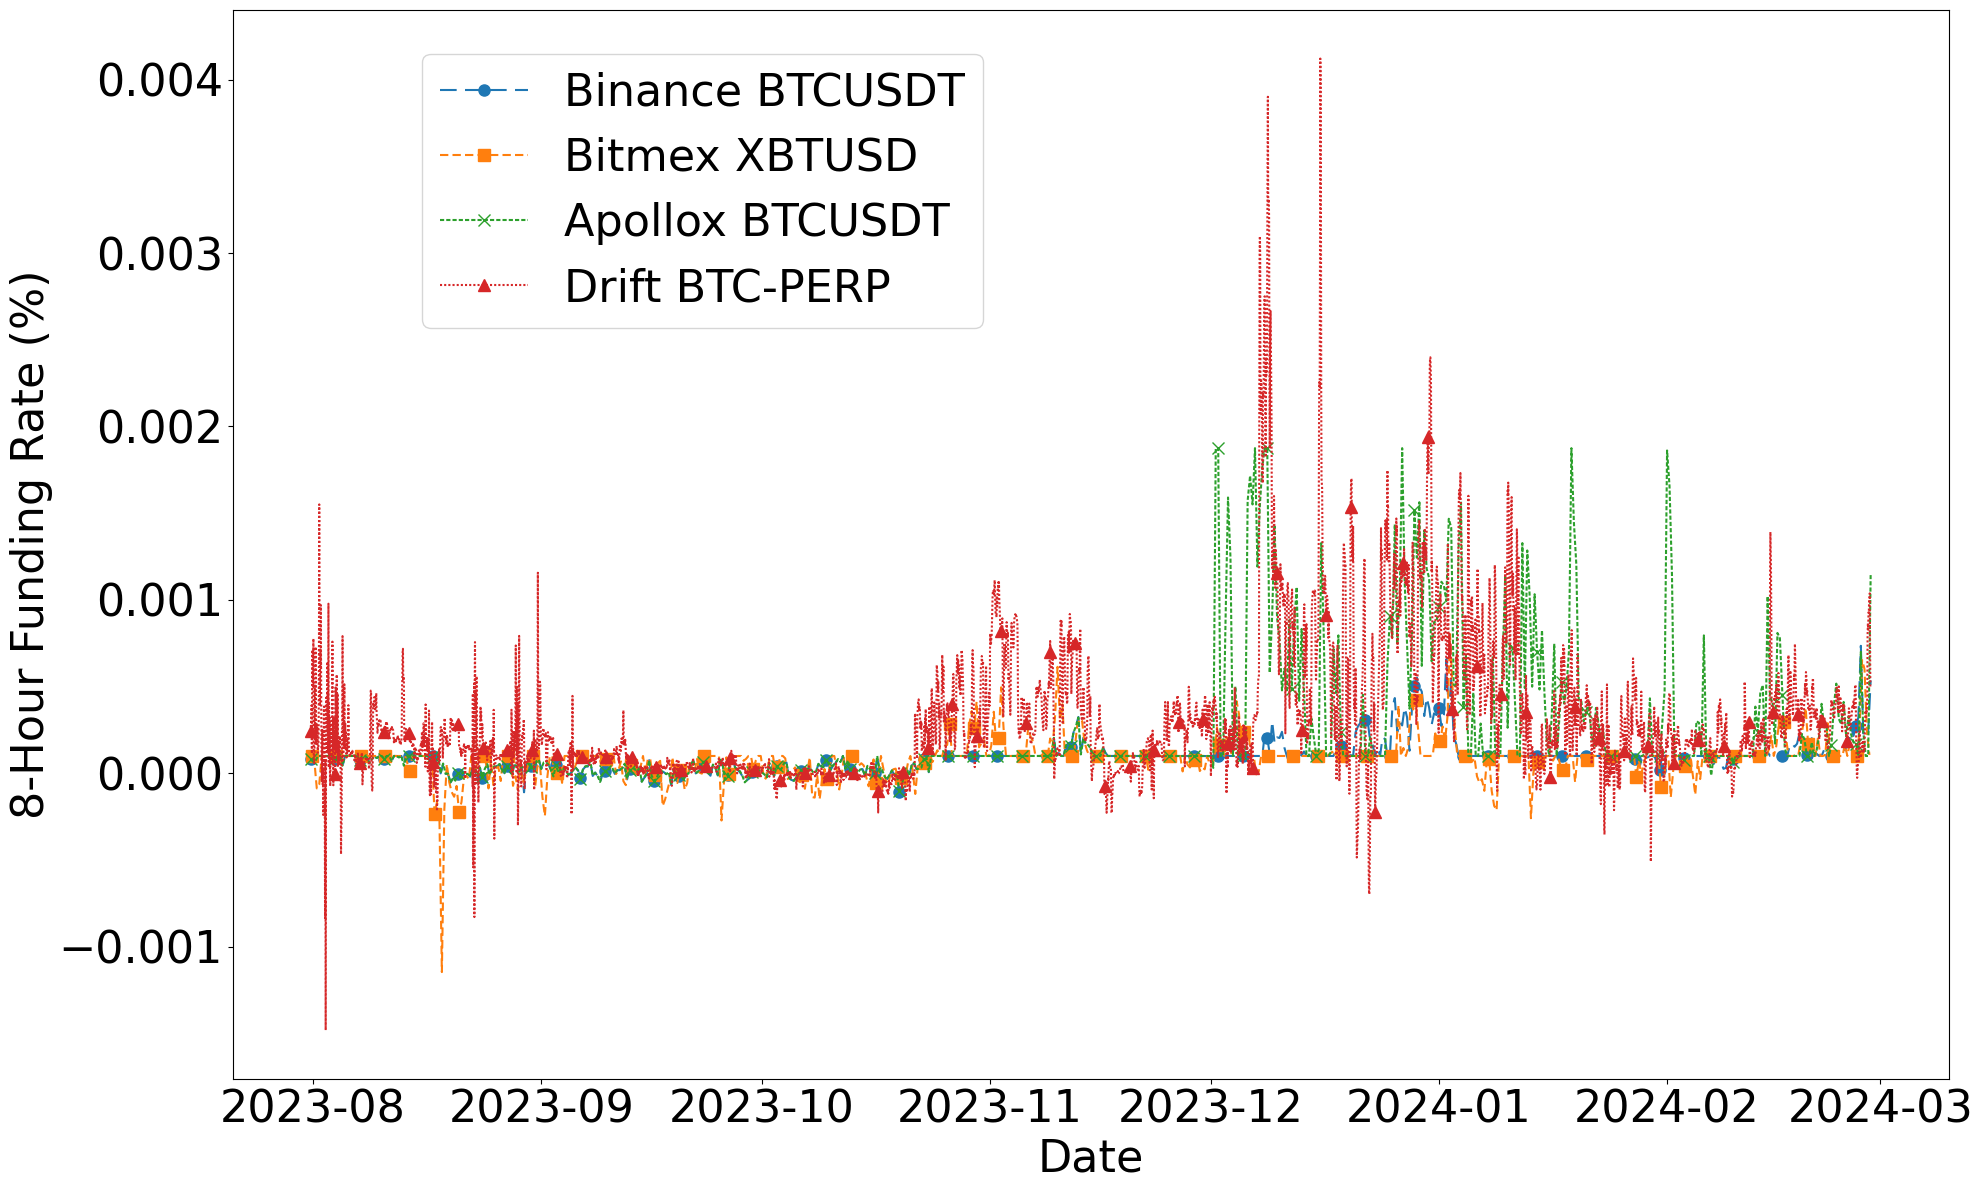

In [4]:
# Plot funding rate arb PNL with HODL PNL
markers = {"binance": "o", "bitmex": "s", "apollox": "x", "drift": "^"}
mark_every = {"binance": 10, "bitmex": 10, "apollox": 10, "drift": 80}
dash_style = {"binance": [8, 4], "bitmex": [4, 2], "apollox": [2, 1], "drift": [1, 1]}
multiplier = {"binance": 1, "bitmex": 1, "apollox": 1, "drift": 8}


fig, ax = plt.subplots(figsize=(20, 12))

# Plot funding result
for exchange, market in exchanges_market.items():
    result_df = results[exchange]
    line,  = ax.plot(
        result_df["datetime"],
        result_df["funding_rate"] * multiplier[exchange],
        label=f"{exchange.capitalize()} {market}",
        # color="black",
        ms=8,
        marker=markers[exchange],
        markevery=mark_every[exchange],
        dashes=dash_style[exchange],
        linewidth=1.5
    )

# Chart settings
lines, labels = ax.get_legend_handles_labels()
plt.xlabel("Date", fontsize=32)
plt.ylabel("8-Hour Funding Rate (%)", fontsize=32)
ax.legend(lines, labels, loc="upper right", bbox_to_anchor=(0.45, 0.98), fontsize=32)

plt.xticks(fontsize=32)
plt.yticks(fontsize=32)

# Ensure a tight layout to avoid label/legend clipping
plt.tight_layout()

plt.savefig(f'./figs/funding_rate_{exchanges_market[benchmark_exchange]}.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

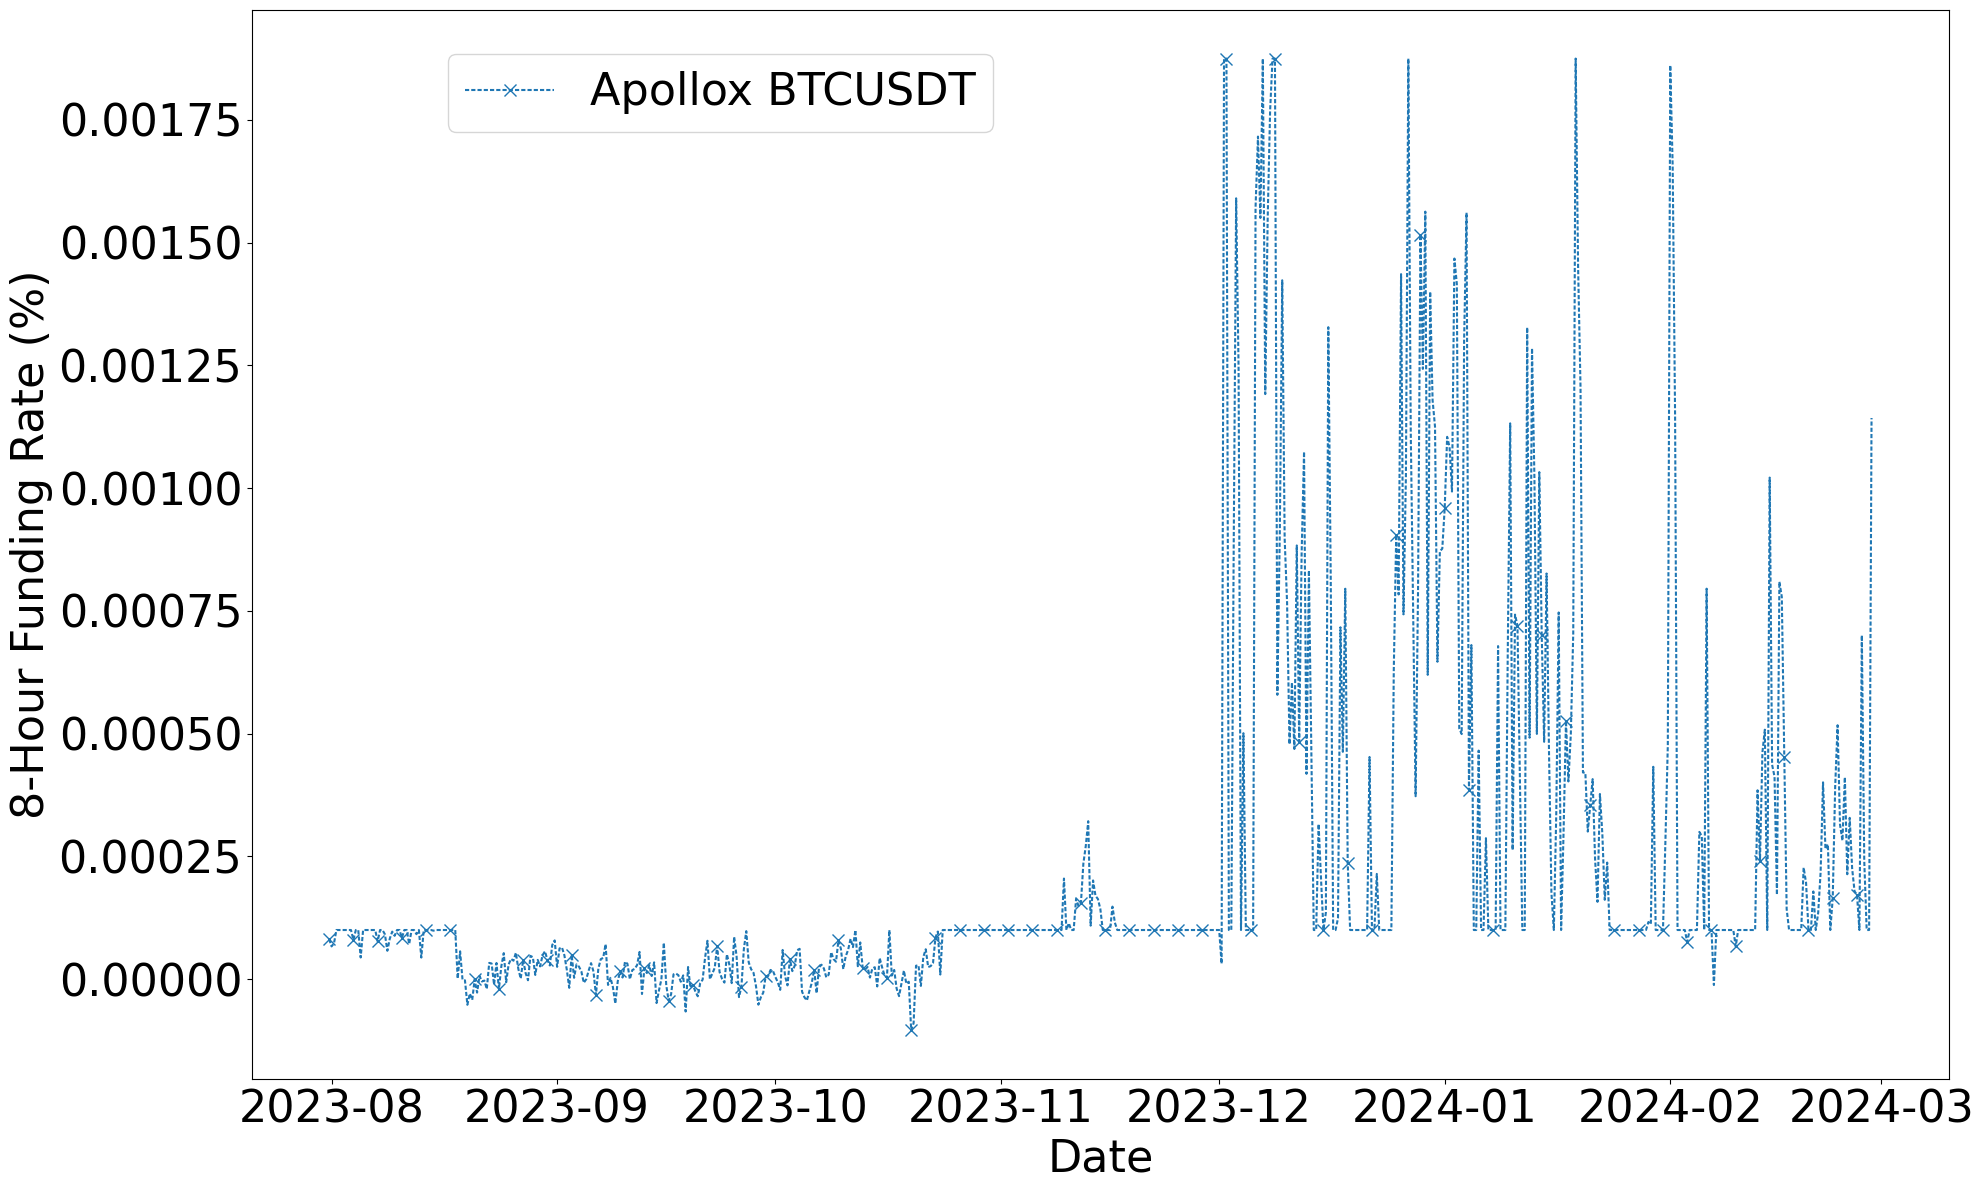

In [5]:
fig, ax = plt.subplots(figsize=(20, 12))

target_exchange = "apollox"
target_market = exchanges_market[target_exchange]

result_df = results[target_exchange]
line,  = ax.plot(
    result_df["datetime"],
    result_df["funding_rate"] * multiplier[target_exchange],
    label=f"{target_exchange.capitalize()} {target_market}",
    # color="black",
    ms=8,
    marker=markers[target_exchange],
    markevery=mark_every[target_exchange],
    dashes=dash_style[target_exchange],
    linewidth=1.5
)

# Chart settings
lines, labels = ax.get_legend_handles_labels()
plt.xlabel("Date", fontsize=32)
plt.ylabel("8-Hour Funding Rate (%)", fontsize=32)
ax.legend(lines, labels, loc="upper right", bbox_to_anchor=(0.45, 0.98), fontsize=32)

plt.xticks(fontsize=32)
plt.yticks(fontsize=32)

# Ensure a tight layout to avoid label/legend clipping
plt.tight_layout()

plt.savefig(f'./figs/funding_rate_{target_exchange}_{exchanges_market[target_exchange]}.png', format='png', dpi=300, bbox_inches='tight')

plt.show()